In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('bank.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Replacing Categorical values



df['marital']= df['marital'].replace({'single':0 , 'married':1})
df['default']=df['default'].replace({'no':0, 'yes':1})
df['loan']= df['loan'].replace({'no': 0, 'yes':1})
df['housing']=df['housing'].replace({'no': 0, 'yes':1})
df['job']= df['job'].replace({'unemployed':8, 'services':6, 'management':0, 'blue-collar':3,
       'self-employed':7, 'technician':1, 'entrepreneur':2, 'admin.':5, 'student':10,
       'housemaid':9, 'retired':4, 'unknown':np.nan})
df['education']= df['education'].replace({'unknown':np.nan, 'primary':2,'tertiary':0, 'secondary':1})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age            0
job           38
marital        0
education    187
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [5]:
df.shape

(4521, 17)

In [6]:
#min max standardisation of data

df['balance']=df['balance'].apply(lambda v: (v-df['balance'].min())/(df['balance'].max()-df['balance'].min()))

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [9]:
df['poutcome']=df['poutcome'].replace({'unknown':np.nan, 'failure':0, 'other':2, 'success':1})

In [10]:
df['y']=df['y'].replace({'no':0, 'yes':1})

In [11]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [12]:
df['month']=df['month'].replace({'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11,
       'sep':9, 'mar':3, 'dec':12})

In [13]:
df['campaign'].unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

In [14]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [15]:
df['contact']=df['contact'].replace({'cellular':0, 'unknown':np.nan, 'telephone':1})

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,0.0,19,10,79,1,-1,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,0.0,11,5,220,1,339,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,0.0,16,4,185,1,330,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,0


In [17]:
df.drop(['day','month',],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,0.0,79,1,-1,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,0.0,220,1,339,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,0.0,185,1,330,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,199,4,-1,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,226,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,6.0,1,1.0,0,0.039999,1,0,0.0,329,5,-1,0,NaN,0
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,153,1,-1,0,NaN,0
4518,57,1.0,1,1.0,0,0.048429,0,0,0.0,151,11,-1,0,NaN,0
4519,28,3.0,1,1.0,0,0.059731,0,0,0.0,129,4,211,3,2.0,0


In [18]:
#scaling pdays and druation

df['duration']=df['duration'].apply(lambda v: (v-df['duration'].min())/(df['duration'].max()-df['duration'].min()))

df['pdays']=df['pdays'].apply(lambda v: (v-df['pdays'].min())/(df['pdays'].max()-df['pdays'].min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,0.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,0.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [19]:
df.to_csv('data scaled.csv',index=False)

In [20]:
df2= pd.read_csv('data scaled.csv')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,0.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,0.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [21]:
df2.describe()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.102164,0.844947,0.016810,0.063565,0.566025,0.152842,0.094151,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.640931,0.115240
std,10.576211,2.675571,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.844900,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.045395,0.000000,0.000000,0.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,0.000000,0.050429,1.000000,0.000000,0.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,0.000000,0.064335,1.000000,0.000000,0.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [22]:
#correlations

df2.corr()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.001264,0.190484,-0.017885,0.083820,-0.193888,-0.011250,0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,-0.041756,0.045092
job,0.001264,1.000000,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.034983,0.005100
education,0.190484,0.329417,1.000000,0.011623,-0.056585,0.072716,0.024752,0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.018278,-0.055368
default,-0.017885,-0.000494,0.011623,1.000000,-0.070886,0.006881,0.063994,-0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.089184,0.001303
balance,0.083820,-0.027549,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,-0.021652,0.017905
housing,-0.193888,-0.031556,0.072716,0.006881,-0.050227,1.000000,0.018451,-0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.074410,-0.104683
loan,-0.011250,-0.000807,0.024752,0.063994,-0.071349,0.018451,1.000000,-0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.042016,-0.070517
contact,0.204200,0.071647,0.117748,-0.023372,0.036326,-0.046484,-0.007166,1.000000,0.055509,-0.014321,-0.027292,0.033973,-0.024204,-0.001642,0.044501,0.002108
day,-0.017853,-0.013250,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.036512,-0.011244
month,0.073764,-0.066394,-0.083234,0.008917,0.099872,-0.170922,0.039226,-0.014321,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.018250,0.023335


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 720x720 with 0 Axes>

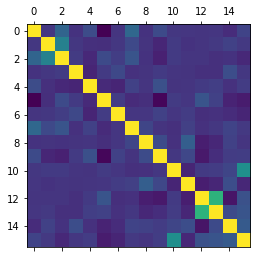

In [24]:
plt.figure(figsize=(10,10))
plt.matshow(df2.corr())


<Figure size 2160x2160 with 0 Axes>

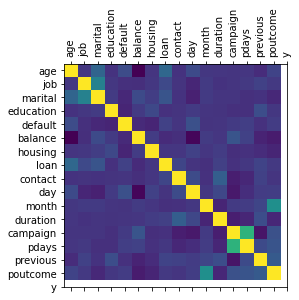

In [25]:

plt.figure(figsize=(30,30))
plt.matshow(df2.corr())
plt.xticks(list(range(len(df2.columns))),df2.columns,rotation="vertical")
plt.yticks(list(range(len(df2.columns))),df2.columns )
plt.show()

In [26]:
df2.corr()['y'].sort_values(ascending= False)

#checking values pf relatedd fields

y            1.000000
duration     0.401118
poutcome     0.142628
previous     0.116714
pdays        0.104087
age          0.045092
month        0.023335
balance      0.017905
job          0.005100
contact      0.002108
default      0.001303
day         -0.011244
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64